In [88]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
import matplotlib.dates as dates

%matplotlib inline
#set plotting style to preference
plt.style.use('ggplot')

In [89]:
data = pd.read_csv('rossmann.csv.gz', skipinitialspace=True,
low_memory=False)

In [90]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Year'] = data.index.year
data['Month'] = data.index.month

In [91]:
data.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month
Date,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7
2015-07-31,2,5,6064,625,1,1,0,1,2015,7
2015-07-31,3,5,8314,821,1,1,0,1,2015,7
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7
2015-07-31,5,5,4822,559,1,1,0,1,2015,7


In [92]:
store1_data = data[data.Store == 1]

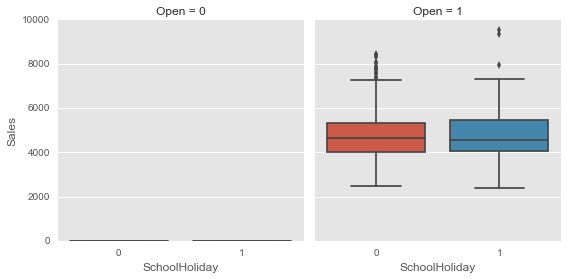

In [93]:
sb.factorplot(
col='Open',
x='SchoolHoliday',
y='Sales',
data=store1_data,
kind='box'
)

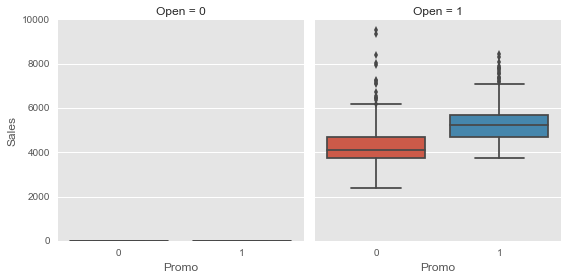

In [94]:
sb.factorplot(
col='Open',
x='Promo',
y='Sales',
data=store1_data,
kind='box'
)

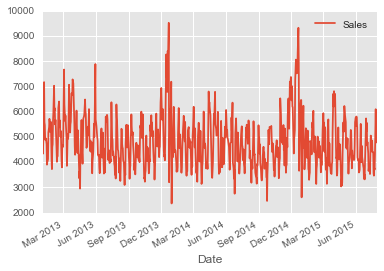

In [95]:
# Filter to days store 1 was open
store1_open_data = store1_data[store1_data.Open==1]
store1_open_data[['Sales']].plot()

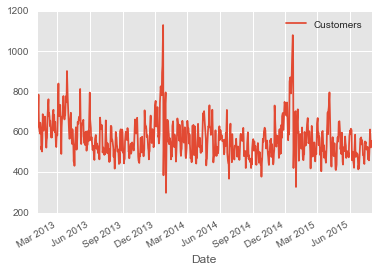

In [96]:
# customer visits over time
store1_open_data[['Customers']].plot()

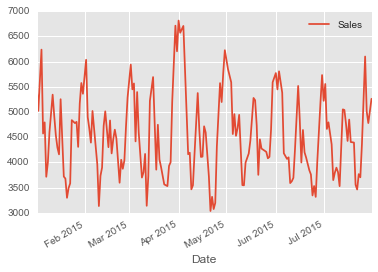

In [97]:
# filter 2015 data
store1_data_2015 = store1_data['2015']
store1_data_2015[store1_data_2015.Open==1][['Sales']].plot()

In [98]:
data['2014'][['Sales']].resample('M', how=['median', 'mean'])

Sales             
            median         mean
Date                           
2014-01-31  5415.0  5431.875799
2014-02-28  5660.0  5731.091512
2014-03-31  5500.0  5584.257312
2014-04-30  5820.5  5815.993333
2014-05-31  5723.0  5632.670534
2014-06-30  5735.5  5681.526188
2014-07-31  5935.0  5999.403381
2014-08-31  5645.0  5649.421252
2014-09-30  5739.0  5865.104029
2014-10-31  5726.0  5665.564878
2014-11-30  6337.5  6179.249661
2014-12-31  6915.0  6973.282456

In [99]:
# sales autocorrelatin with lag 1 Week
data['Sales'].resample('W', how='mean').autocorr(lag=1)

-0.50703966061586958

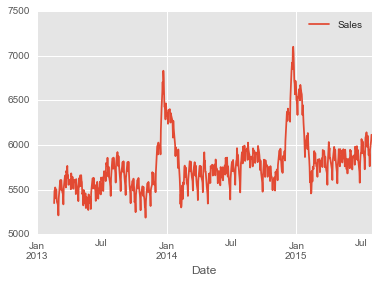

In [100]:
# rolling mean/median 
pd.rolling_mean(data[['Sales']], window=50, center=False, freq='D').plot()

In [101]:
data['Sales'].resample('M', how='sum').head()

Date
2013-01-31    180132207
2013-02-28    171534275
2013-03-31    201180369
2013-04-30    183431432
2013-05-31    185411063
Freq: M, Name: Sales, dtype: int64

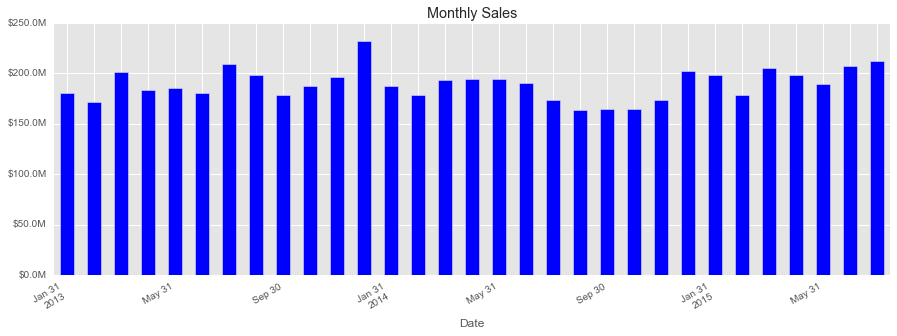

''

In [106]:
"""
The new ticker code was designed to explicitly support user customized
ticking.  The documentation
http://matplotlib.org/matplotlib.ticker.html details this
process.  That code defines a lot of preset tickers but was primarily
designed to be user extensible.

In this example a user defined function is used to format the ticks in
millions of dollars on the y axis
"""
import matplotlib.ticker as ticker


# set figsize
plt.rc('figure', figsize=(15, 5))

# y-axis formatting
def millions(x, pos):
    'The two args are the value and tick position'
    return '$%1.1fM' % (x*1e-6)

formatter = ticker.FuncFormatter(millions)

# montly sales sum
df_ts = data['Sales'].resample('M', how='sum')

ax = df_ts.plot(kind='bar', x=df_ts.index, title='Monthly Sales')

# Make most of the ticklabels empty so the labels don't get too crowded
ticklabels = ['']*len(df_ts.index)
# Every 4th ticklable shows the month and day
ticklabels[::4] = [item.strftime('%b %d') for item in df_ts.index[::4]]
# Every 12th ticklabel includes the year
ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in df_ts.index[::12]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
ax.yaxis.set_major_formatter(formatter)
plt.gcf().autofmt_xdate()
plt.show()

;

